In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df_players = pd.read_csv(r"/content/drive/My Drive/final_data.csv")
df_players.dropna(inplace=True)

In [9]:
df_players.head(6)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0


In [10]:
df_players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


We separate goalkeepers and regular players as their stats will differ and this may lead to bias in our regression model. An example can be the goals and assists features. As the goalkeeper can't score or assist, there features will have 0 as the value which can affect the regression model in a bad way. We will first look at goalkeepers and then the regular players.

In [11]:
df_gk = df_players[df_players["position"] == "Goalkeeper"]
df_players = df_players[df_players["position"] != "Goalkeeper"]

In [12]:
gk_cols = [
    'current_value',
    "height",
    "age",
    "appearance",
    "goals conceded",
    "clean sheets",
    "minutes played",
    "award",
    "highest_value",
]
player_cols = [
    'current_value',
    "height",
    "age",
    "appearance",
    "goals",
    "assists",
    "yellow cards",
    "second yellow cards",
    "red cards",
    "minutes played",
    "award",
    "highest_value",
]

These columns were chosen as they seem like they should have greater impact on current value

In [13]:
df_gk = df_gk.drop(columns = df_gk.columns.difference(gk_cols))
df_players = df_players.drop(columns = df_players.columns.difference(player_cols))

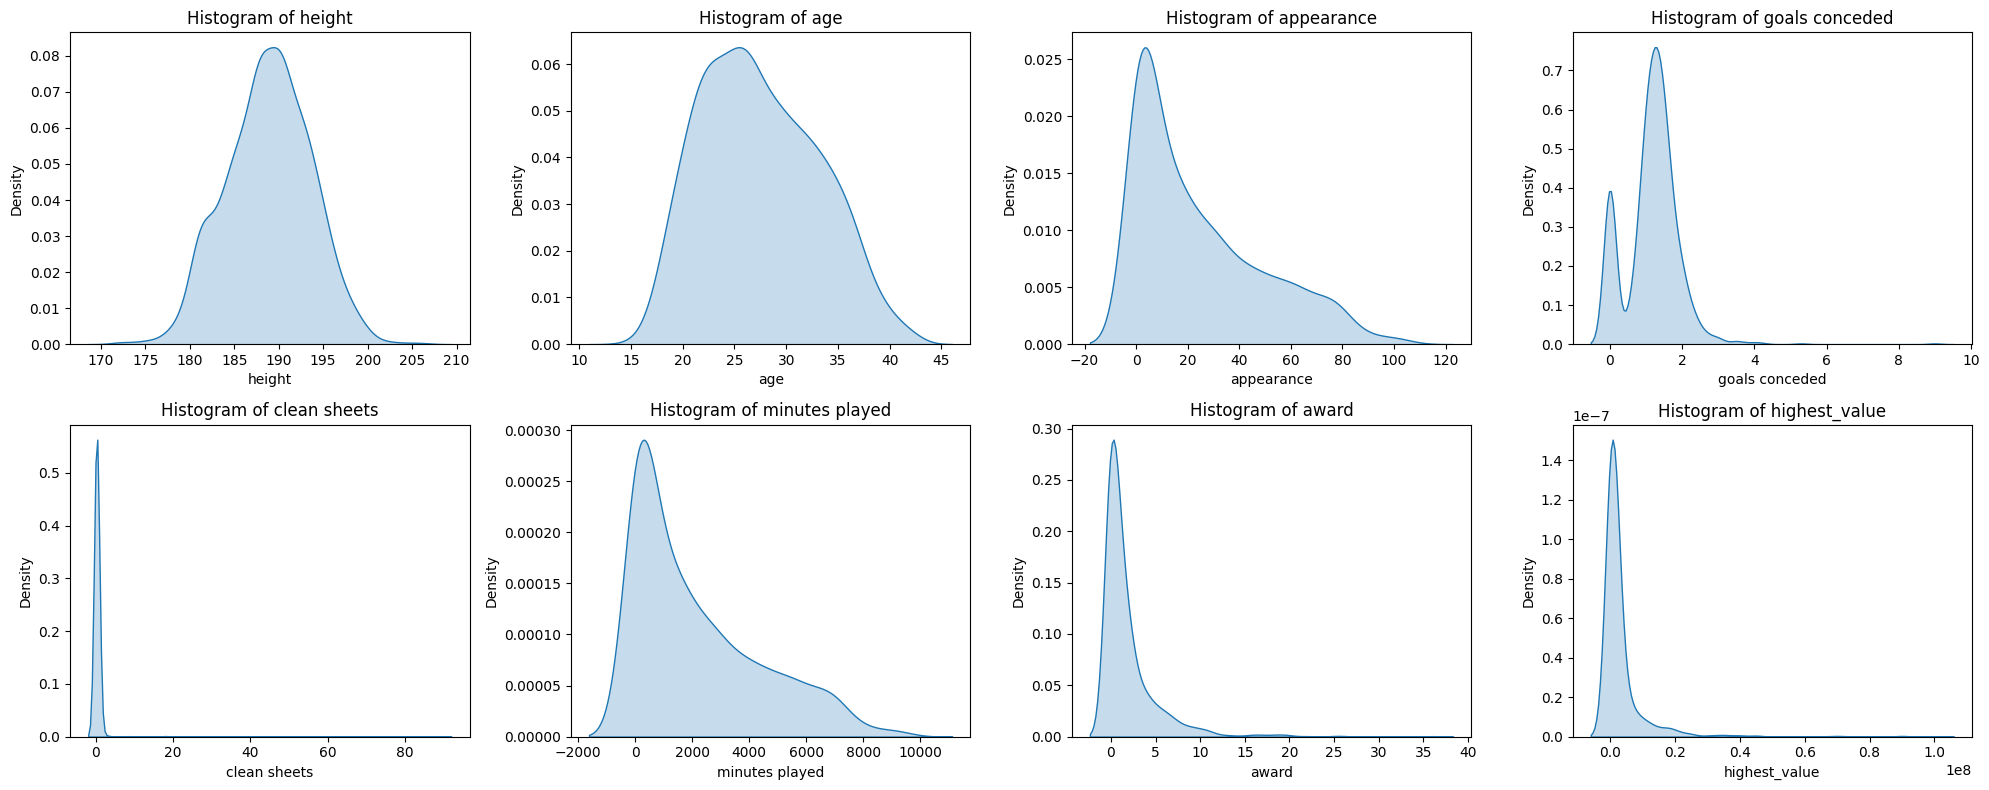

In [14]:
n_features = len(gk_cols[1:])

n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(gk_cols[1:]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df_gk[feature], fill=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

It can be seen that height and age are normally distributed and the bulk of the players are close to 1.90m and 25 years of age. The other features have right skew which may be because of outliers in the data which we will look at in the scatter plots. Because of being normally distributed, height and age can be good features to use in a regression model. The other features seem to have problems with their distribution either because of outliers or other factors which may lead to overfitting problems in regression.

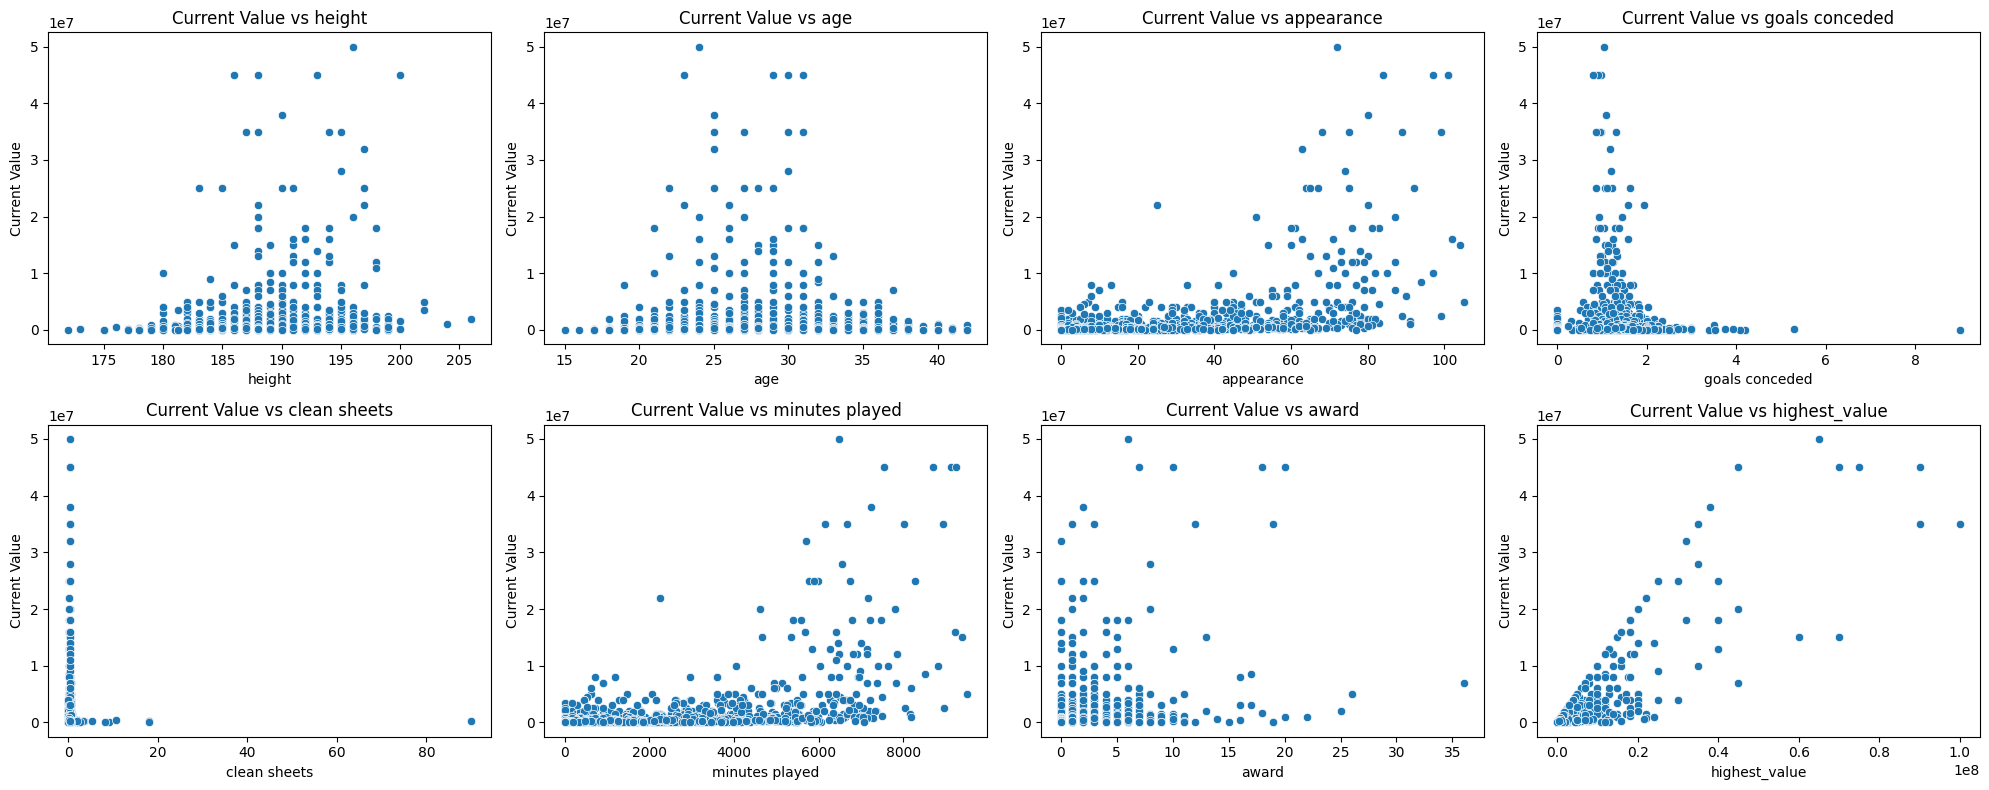

In [15]:
n_features = len(gk_cols[1:])

n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(gk_cols[1:]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df_gk[feature], y=df_gk["current_value"])
    plt.title(f"Current Value vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Current Value")

plt.tight_layout()
plt.show()

For goalkeepers, the trend is around 1.90m for height, similarly for age the trend is around 25 years of age and most high value players are around these numbers. Goalkeepers often reach their peak performance later and maintain high performance levels longer due to the nature of their role, which relies less on physical speed and more on experience and tactical understanding which may be the reason high value players are around these ranges. As number of apperances increase it seems that the value also increases which is expected as more appereances makes a player more experienced and thus more valuable in the eyes of the public and other teams. Goals conceded graph shows that most high value players have around 1-2 goals conceded however this doesn't mean it has high correlation with value. There seems to be not enough data for clean sheets graph as most values are 0 or very close to 0 with some outliers. More minutes correlate with higher values, showing a clear trend. Awards don't seem to have that much of an impact on value as players with more awards don't seem to have more value. For highest value there seems to be strong correlation as there is a clear, almost linear increase in current value.

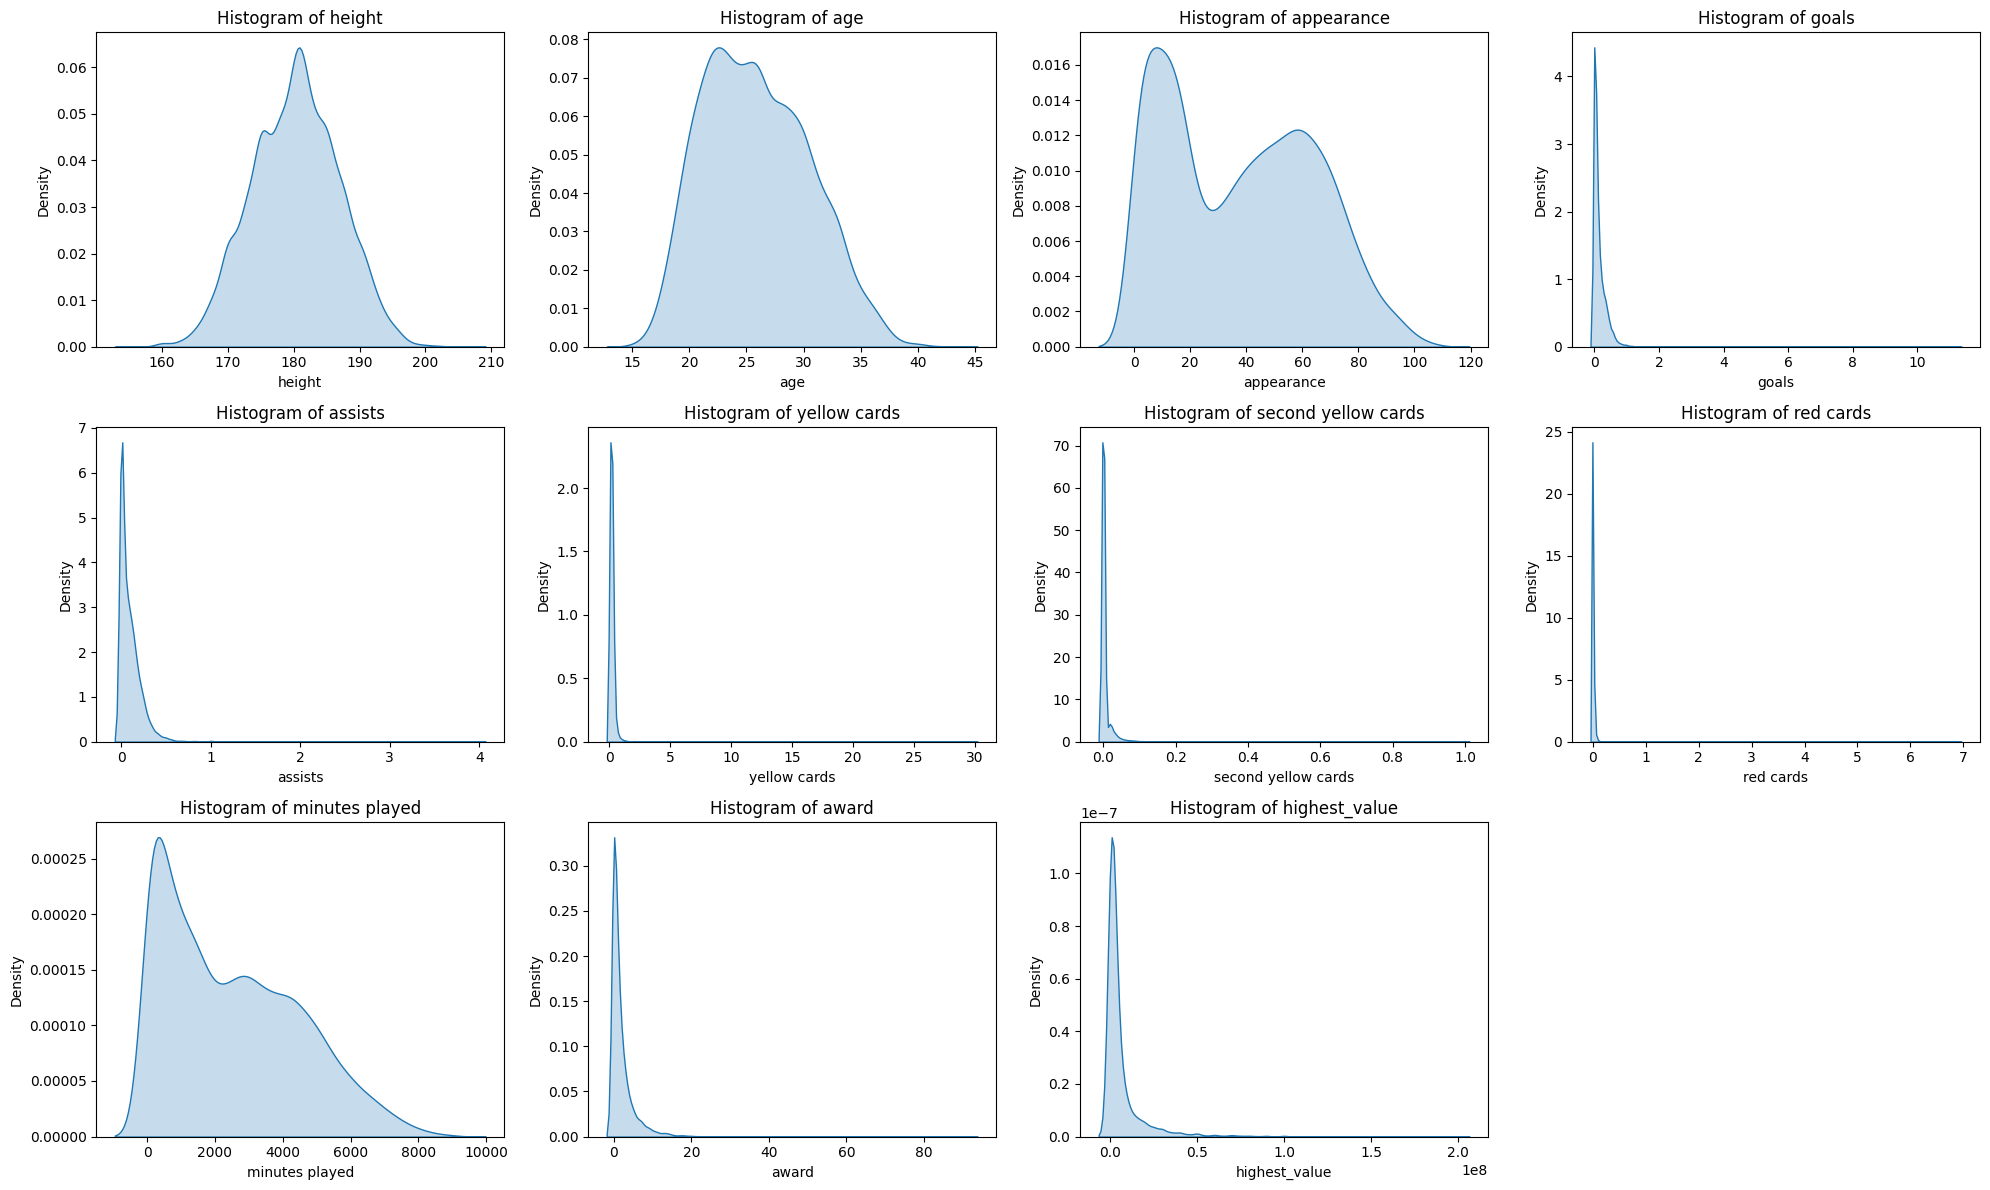

In [16]:
n_features = len(player_cols[1:])

n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(player_cols[1:]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df_players[feature], fill=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

The distribution of height peaks around 180 cm, typical for football players, emphasizing an ideal range for physical attributes in most roles except maybe for goalkeepers who tend to be taller. The age distribution shows a peak in the mid to late 20s, reflecting the prime age for outfield players in terms of physical capability and accumulated experience. The appearance histogram shows a skewed distribution with many players having fewer appearances, and fewer players accumulating a high number of appearances, suggesting that sustained participation at the professional level is limited to fewer players. Goals scored have a highly skewed distribution, with most players scoring few goals. This indicates that high goal scorers are rare and potentially very valuable. Similar to goals, assists are skewed towards lower numbers, highlighting the rarity and thus potential value of players who frequently assist goals. The majority of players receive few yellow cards, with the number decreasing as the card count increases. Discipline issues appear less frequent among players but can still impact a player’s availability and reliability. Red cards are much less common than yellow cards, with most players not receiving any red cards. This suggests that severe discipline issues are rare. The histogram of minutes played reflects a broad range of playtime, with a peak at lower minutes. This can imply a large bench or rotation of players who get limited time on the field. Most players do not receive awards, which, when they do occur, can significantly enhance a player’s market value. The peak at the lower end with a tail extending towards higher values suggests that while most players have a moderate market value, a few reach significantly higher valuations.

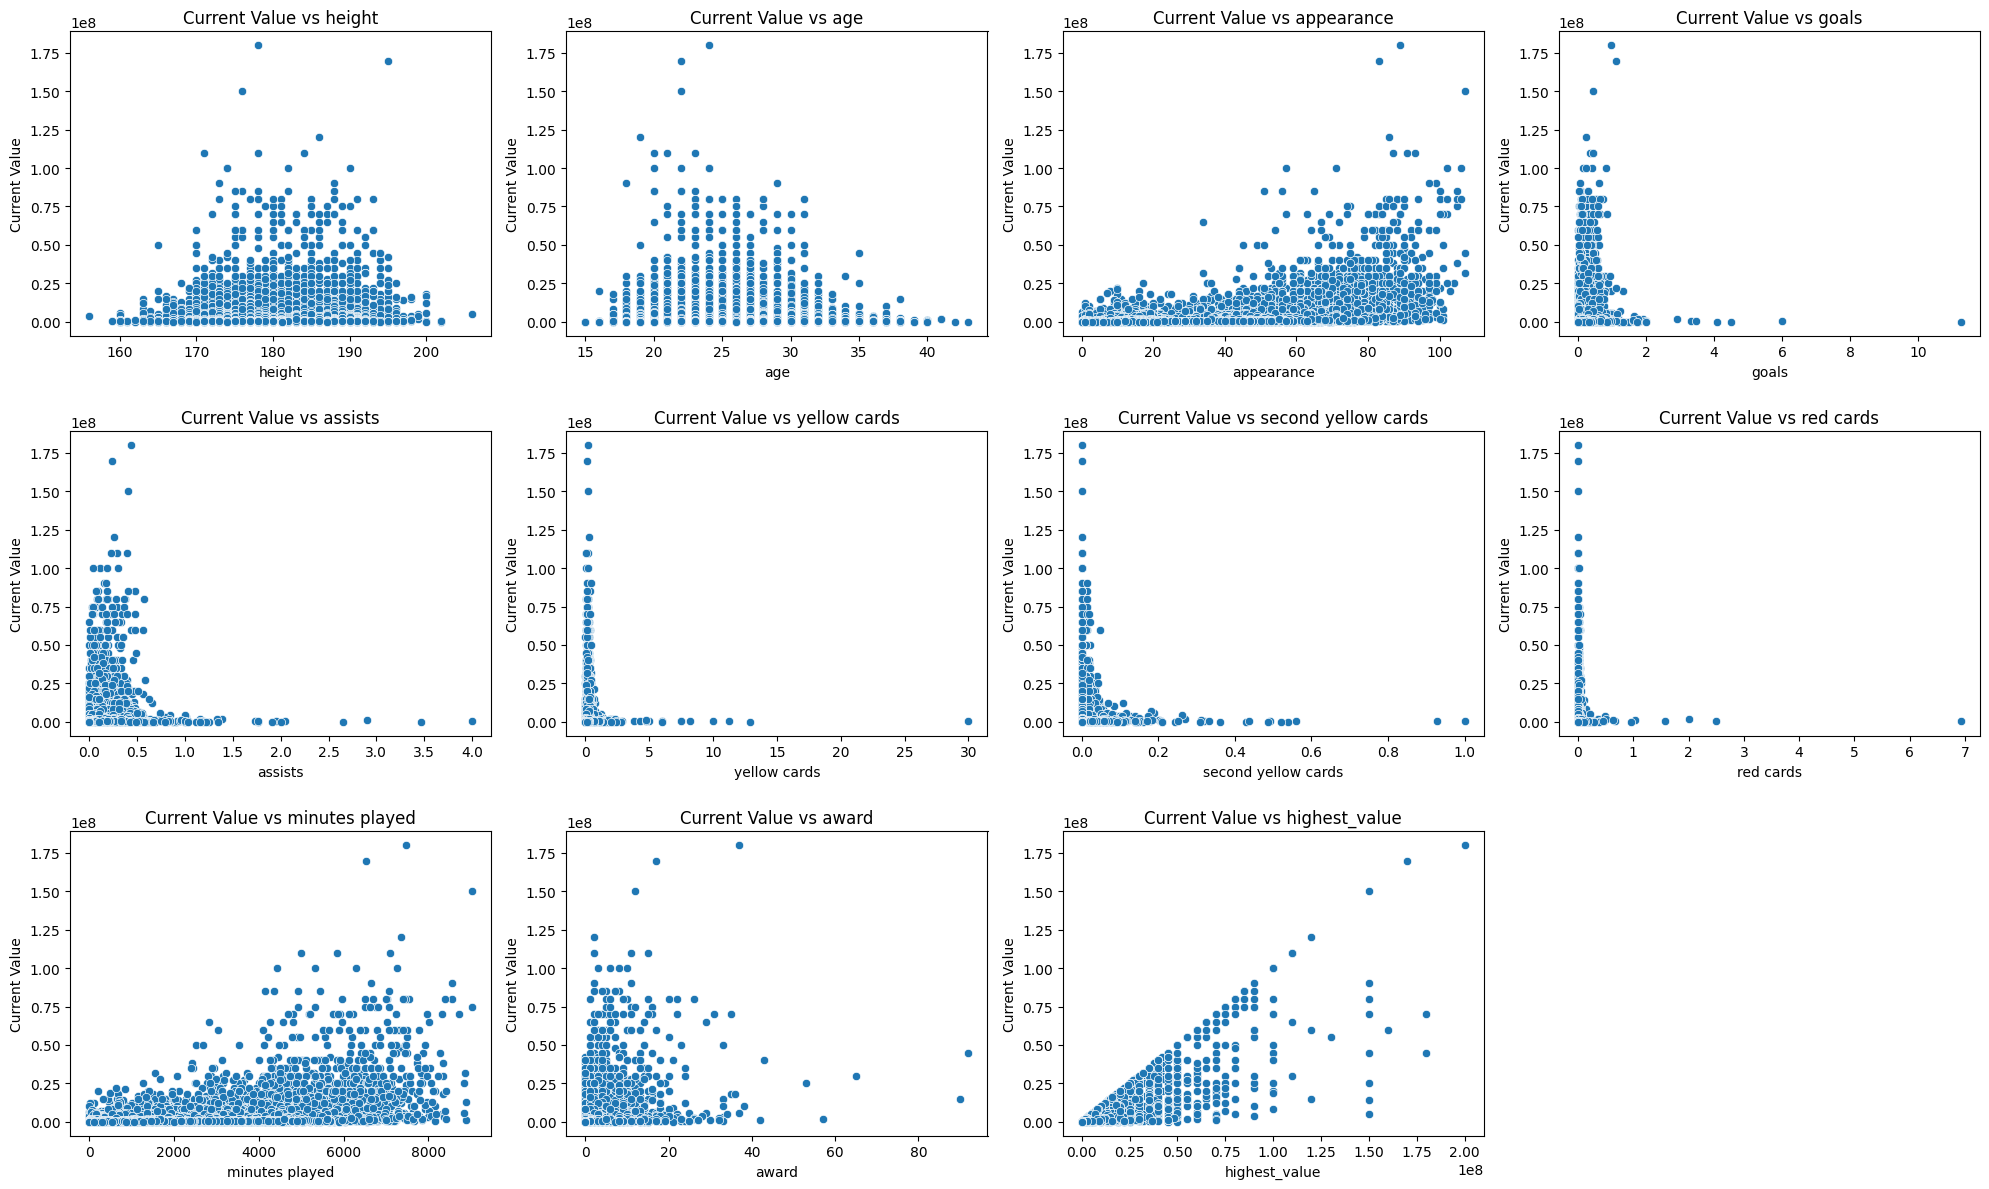

In [17]:
n_features = len(player_cols[1:])

n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(player_cols[1:]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df_players[feature], y=df_players["current_value"])
    plt.title(f"Current Value vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Current Value")

plt.tight_layout()
plt.show()

There is no clear trend linking height to current value. Height is not a primary determinant of value. Current value peaks in mid-career and declines sharply after the prime years, especially for outfield players. More appearances correlate with higher values, showing that experience and consistency are important. A strong correlation with goals highlights the value of players who can change the game. Assists also show a positive trend, valuing offensive playmakers. Yellow cards have a mixed influence on value. Discipline is important but not critical unless card counts are high. Red cards are rare and do not strongly influence value unless they lead to suspensions. More minutes played correlate with higher values, showing the importance of regular starters. Awards have a significant positive impact on market value. High-value players tend to maintain their market valuation over time.

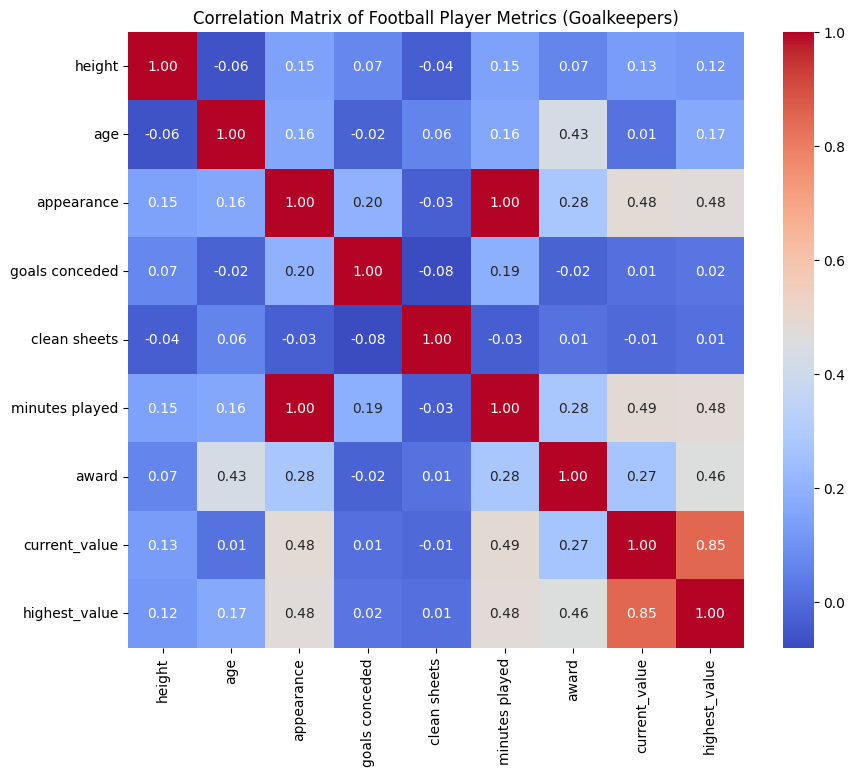

In [18]:
correlation_matrix_gk = df_gk.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_gk, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Football Player Metrics (Goalkeepers)')
plt.show()

The correlation plot suggests that age, goals conceded and clean sheets have almost zero correlation with current value of a player. Height and award seems to have minimal correlation and appearance, minutes played has good correlation with current value which is expected for goalkeepers. Highest value has the biggest correlation which is also expected as valued players will be more wanted and thus higher valued.  

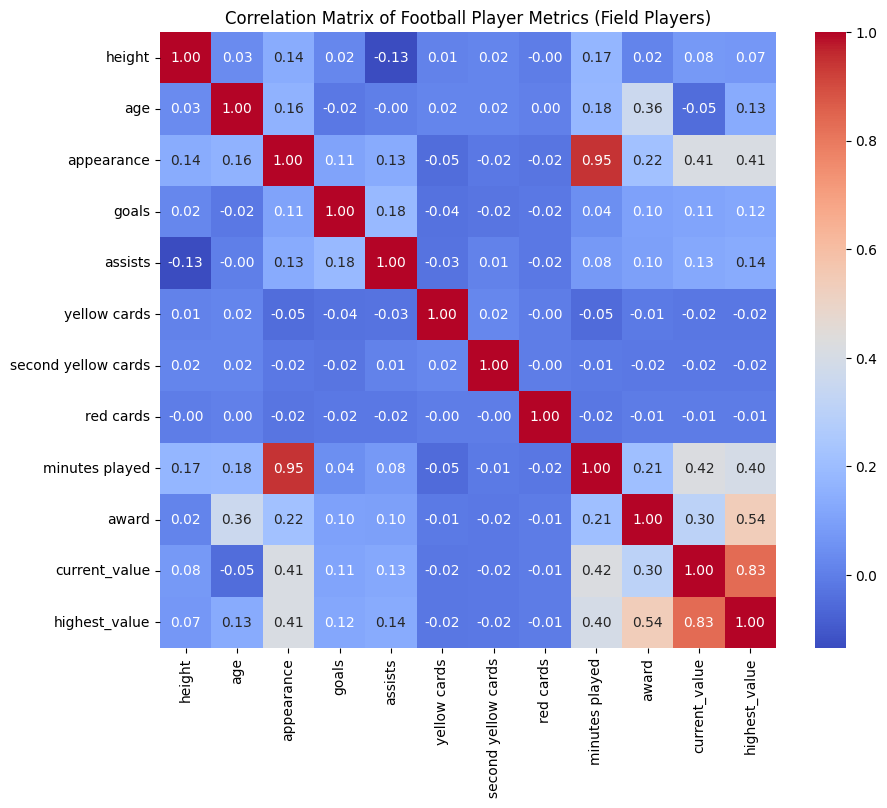

In [19]:
correlation_matrix_player = df_players.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_player, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Football Player Metrics (Field Players)')
plt.show()

Correlation plot of field players seems similar to goalkeepers and the newly added features don't seem to have that much correlation with current value of the player.

In [20]:
X_player = df_players.drop(columns="current_value")
Y_player = df_players[["current_value"]]
X_gk = df_gk.drop(columns="current_value")
Y_gk = df_gk[["current_value"]]

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
p_val_reg = LinearRegression()
p_val_reg.fit(X_player,Y_player)
gk_val_reg = LinearRegression()
gk_val_reg.fit(X_gk, Y_gk)

LinearRegression()

In [23]:
print('Players Intercept: \n', p_val_reg.intercept_)
print('Players Coefficients: \n', p_val_reg.coef_)
print('Goalkeepers Intercept: \n', gk_val_reg.intercept_)
print('Goalkeepers Coefficients: \n', gk_val_reg.coef_)

Players Intercept: 
 [7572867.0983921]
Players Coefficients: 
 [[-6.00185637e+03 -2.77989660e+05 -6.05188643e+04  8.21285766e+05
   1.06089237e+06  1.04776267e+05 -1.80775142e+05 -1.28009114e+05
   1.36132222e+03 -3.60030894e+05  6.01803991e-01]]
Goalkeepers Intercept: 
 [283527.38464248]
Goalkeepers Coefficients: 
 [[ 1.14705533e+04 -8.59703909e+04 -2.02968051e+05 -2.49922407e+05
  -5.58065922e+03  2.53746849e+03 -1.86639713e+05  4.96408986e-01]]


In [24]:
mean_values_player = X_player.mean()
mean_values_gk = X_gk.mean()
prediction_player = p_val_reg.predict([mean_values_player])
prediction_gk = gk_val_reg.predict([mean_values_gk])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
print("Prediction of mean values for goalkeepers:\n", prediction_gk)
print("Prediction of mean values for field players:\n", prediction_player)

Prediction of mean values for goalkeepers:
 [[1650801.46460537]]
Prediction of mean values for field players:
 [[3877437.79527559]]
